
# Bleed AI Intern Test / Assignment

## Task
### An image and provides a color distribution chart of that image and also Optionally tells the dominant colors in the image.

### Task completed by : Maryam Rafaqat 

In [120]:
#install libraries 
!pip install easydev                 
!pip install colormap               
!pip install opencv-python           
!pip install colorgram.py          
!pip install extcolors               


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

import cv2
import extcolors                    #The extcolors library returns the RGB values.
from colormap import rgb2hex        #Convert RGB values to HEX color codes.
from sklearn.cluster import KMeans
import imutils

In [91]:
# image resize 

input_name = '/content/drive/MyDrive/images_folder/island.jpg'  #input image from google drive
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


In [92]:
#save the image
resize_name = '' + input_name   #the resized image name
img.save(resize_name)                 

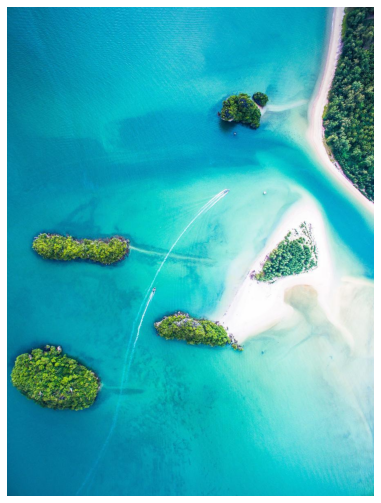

In [93]:
#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [94]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)  #tolerance gives better visual representation based on a scale from 0 to 100 where 0 will not group any color and 100 will group all colors into one.
                                                                             # limit is the upper limit to the number of extracted colors presented in the output.

colors_x

([((4, 144, 169), 247254),
  ((5, 171, 187), 202088),
  ((4, 118, 154), 167543),
  ((3, 197, 196), 107269),
  ((254, 254, 254), 72793),
  ((172, 232, 224), 63925),
  ((210, 232, 229), 55824),
  ((111, 222, 213), 25681),
  ((50, 92, 68), 18098),
  ((0, 56, 57), 13557),
  ((0, 31, 40), 8240),
  ((80, 127, 95), 7823)],
 1080000)

In [95]:
# creating data frame after converting RGB to HEX colors.
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['colour_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,colour_code,occurence
0,#0490A9,247254
1,#05ABBB,202088
2,#04769A,167543
3,#03C5C4,107269
4,#FEFEFE,72793
5,#ACE8E0,63925
6,#D2E8E5,55824
7,#6FDED5,25681
8,#325C44,18098
9,#003839,13557


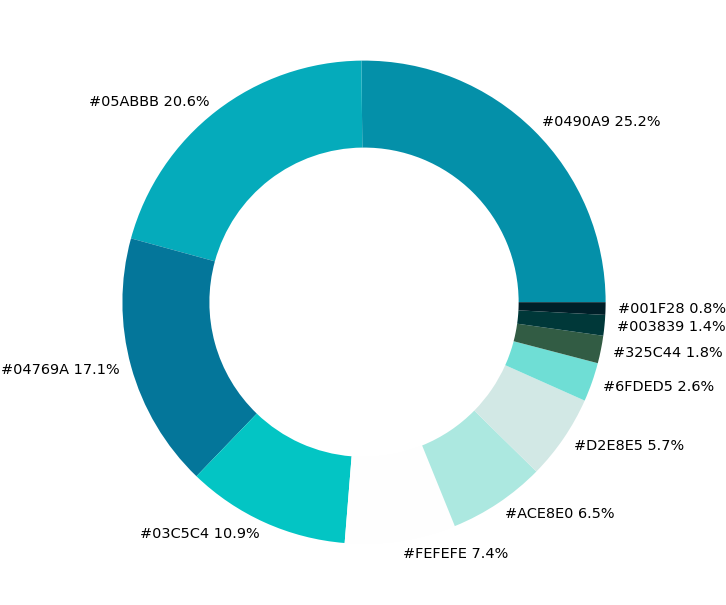

In [96]:
#colour codes , percentage distribution and plotting a chart
list_color = list(df_color['colour_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(100,100),dpi=8)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 130, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

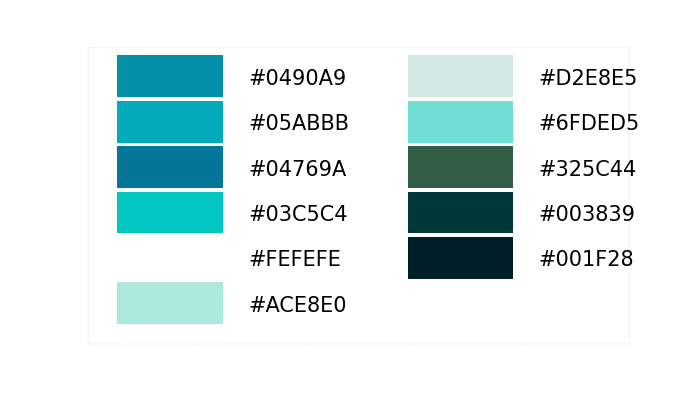

In [97]:

#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)

In [14]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=de3ba2baf15b7ad1c9b807e93db94f7e000b8b797980ea010cff0dbbae730ff7
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [15]:
!pip3 install KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11791 sha256=c1ccae3a4537490c997a183c2b34c2d162e4c95591ce2a621f68483f816a3740
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built KMeans


In [115]:
#reading and resizing image for dominant colors
clusters = 4 

img = cv2.imread('/content/drive/MyDrive/images_folder/island.jpg')
org_img = img.copy()
print('Org image shape --> ',img.shape)

img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)

flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

Org image shape -->  (1200, 900, 3)
After resizing shape -->  (200, 150, 3)
After Flattening shape -->  (30000, 3)


KMeans(n_clusters=4, random_state=0)

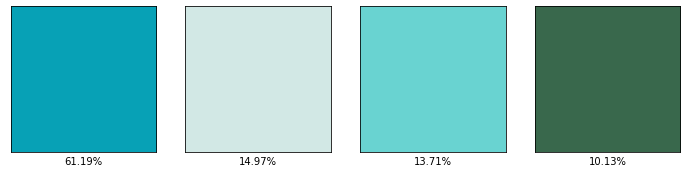

In [116]:
# 4 clusters distribution
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)


block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

([], <a list of 0 Text major ticklabel objects>)

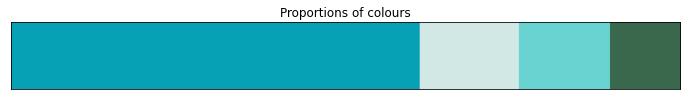

In [117]:
#proportions of colours in amage
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colours')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])

In [118]:
#showing most dominant colours in the image
from google.colab.patches import cv2_imshow
rows = 1000
cols = int((org_img.shape[0]/org_img.shape[1])*rows)
img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


start = rows//2-220
for i in range(4):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20



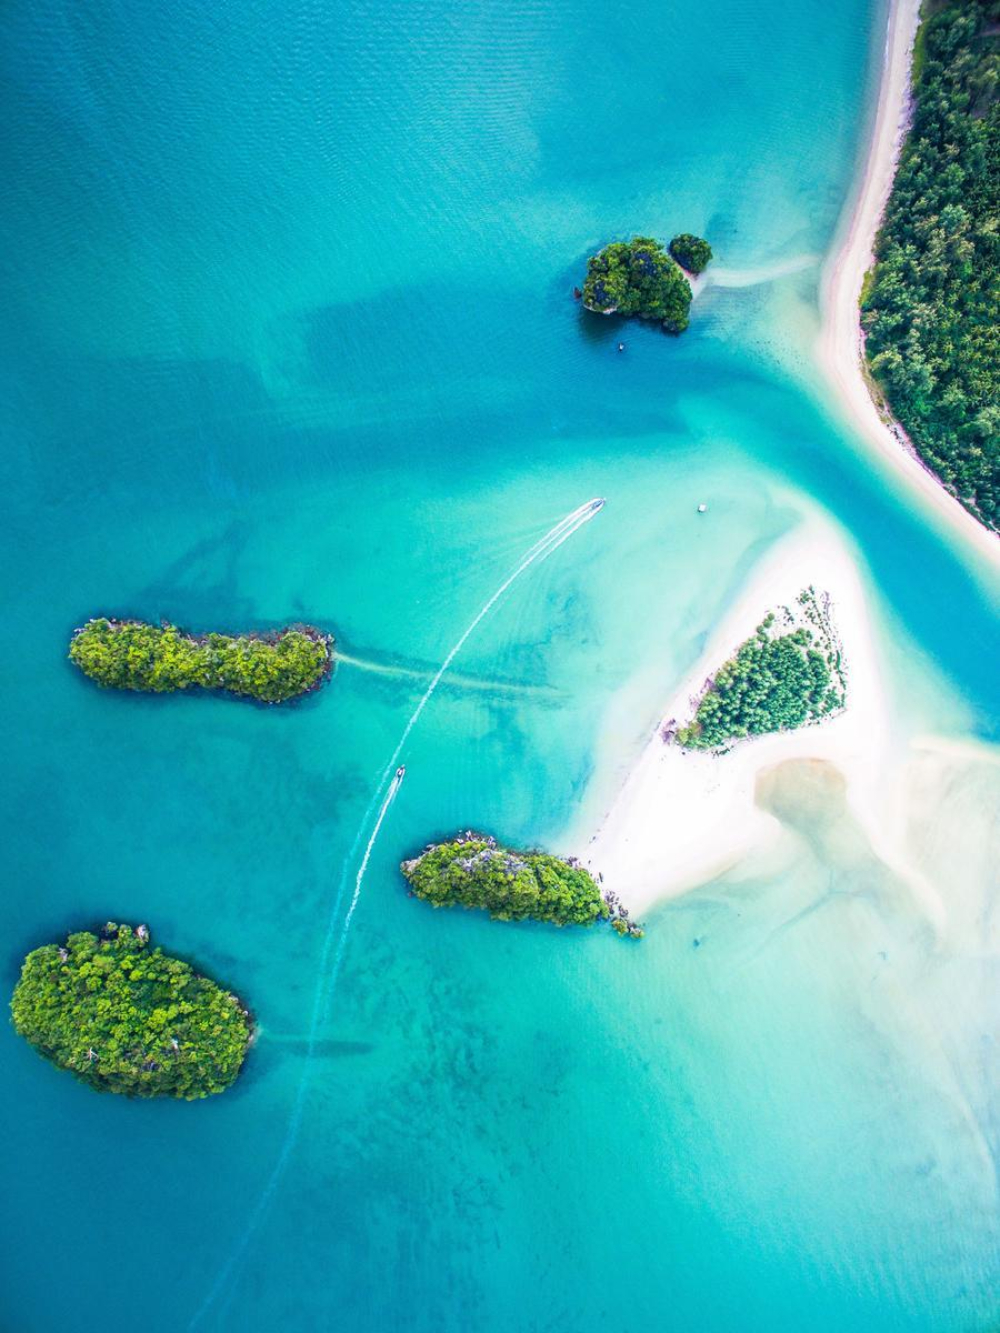

True

In [119]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('output_with_dominant_colour.png',final)

#References

###https://medium.com/buzzrobot/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036
###https://cloudinary.com/guides/bulk-image-resize/python-image-resize-with-pillow-and-opencv
###https://realpython.com/k-means-clustering-python/
###https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e
###https://machinelearningprojects.net/most-dominant-colors-in-an-image/